# **Capstone Project : Used Cars Price Prediction**


## Author : Antoine Presty
## Date : March 30, 2023

### **Problem Definition** <a id='definition'></a>

### **The Context:**

The problem at hand is the pricing scheme of used cars in the Indian market. As the demand for pre-owned cars vehicles continues to grow and new car sales slow down, Cars4U seeks to take advantage of this market opportunity by developing a pricing scheme that addresses the uncertainties related to pricing and supply.
This problem is important to solve because it presents an opportunity for Cars4U to enter the growing market and increase their market share. By addressing the challenge in pricing and supply in the used car market, Cars4U can differentiate itself from competitors and provide value to customers.

### **The Objective:**

The intended goal is to develop a pricing scheme for used cars that accurately reflects their worth and meets the needs of both buyers and sellers. By doing so, Cars4U can improve its position in the pre-owned car market and capture a larger share of the demand.

### **Key questions:**

Here some key questions that need to be answered in order to develop an effective pricing scheme for used cars in the Indian market include:

- How can machine learning be used to accurately predict the value of a used car?
- What factors influence the actual worth of a used car in the Indian market (e.g., mileage, brand, model, year, etc.)?
- How can Cars4U differentiate itself from competitors in the pre-owned car market?

### **Problem formulation**:

Using data science, the goal is to develop a predictive model that accurately estimates the worth of a used car based on relevant factors (e.g., mileage, brand, model, year, etc.). This model can be used by sellers to set prices and by buyers to assess the value of a used car. By developing an accurate pricing scheme that meets the needs of both buyers and sellers, Cars4U can grow its market share in the pre-owned car market.

We will follow a structured process that includes the following steps:

1. [Data Overview](#data_overview)
2. [Exploratory Data Analysis](#eda)
3. [Data Cleaning](#data_clean)
4. [Feature Engineering](#feature)
5. [Model Selection and Training](#model_selection)
6. [Model Evaluation and Optimization](#model_evaluation)

### **Methods**

In this project, we will use the following Python libraries and tools to perform our analysis and build the machine learning model:
* Pandas for data loading, cleaning, and preparation
* Matplotlib, Seaborn and SciPy for data visualization
* Scikit-learn and Statsmodels for feature engineering, model selection, and training
* Numpy for mathematical and statistical operations

### **Project Structure**

The Jupyter notebook is organized as follows:
1. Data Overview: First of all, we will load the data and get a high-level understanding of the data. 

2. Exploratory Data Analysis: We will perform an exploratory analysis of the data to understand the distribution of the variables, identify patterns, and visualize relationships between different variables using graphs and charts.

3. Data Cleaning : After that we will clean and preprocess the raw data to ensure that it is consistent, complete, and ready for the next step. This may include tasks such as handling missing values, removing duplicates, and transforming variables as needed.

4. Feature Engineering: Once the data has been cleaned, we will create new features based on existing variables to help the machine learning model make better predictions. This may involve combining variables or applying other mathematical transformations.

5. Model Selection and Training: We will select an appropriate machine learning algorithm and train it using the preprocessed data. 

6. Model Evaluation and Optimization: We will evaluate the performance of the trained model using metrics such as mean squared error and R squared, and make improvements as necessary by adjusting model parameters.We will also use cross-validation techniques to ensure that the model is robust and not overfitting to the training data.


### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

**Loading libraries**

In [1]:
# Importing libraries for data manipulation
import numpy as np

import pandas as pd

# Importing libraries for data visualization

import seaborn as sns
from scipy.stats import skew
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline 

# Importing libraries for building linear regression model

from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm


# Import library for preparing data
from sklearn.model_selection import train_test_split

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

**Loading data**

In [2]:
df = pd.read_csv("used_cars.csv") # Loading data

df.head() # Check the first 5 rows of the dataset

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [3]:
df.tail() # Check the last 5 rows of the dataset

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


**Observation:**

- The price of the used car indicated by the variable **Price** is our target variable. The rest of variables are independent variables based on which we will predict the used car price (**Price**).

### Data Overview <a id='data_overview'></a>

In [4]:
df.shape # Check the dimensionality of the DataFrame

(7253, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


**Observations:**

- There are **7253 observations** and **14 columns** in the dataset.
- There are some missing values especially the **"New_Price"**, **"Price"**, **"Power"**, **"Seats"**, **"Engine"** and **"Mileage"** columns. We will treat them after performing the EDA.
- There are 5 categorical columns and 9 numerical columns.

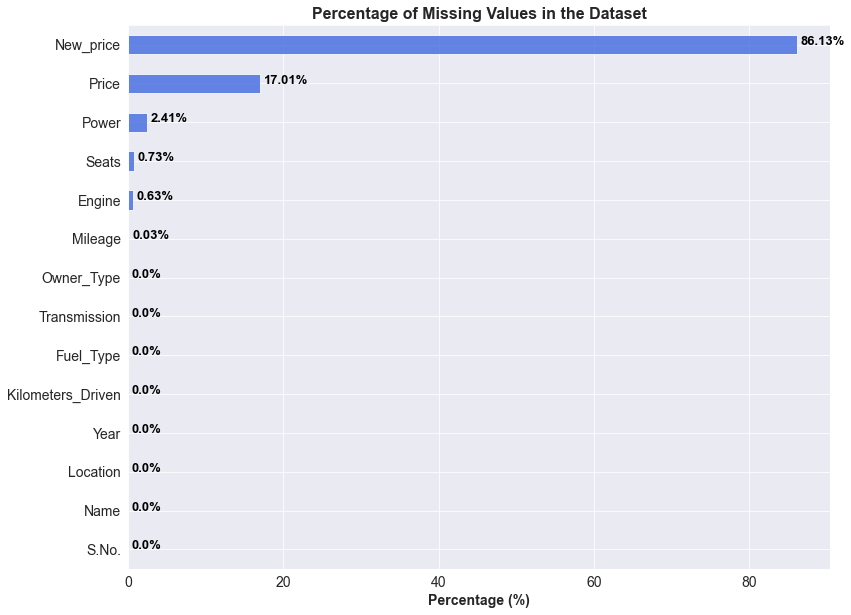

In [6]:
# Set plot style
sns.set_style('darkgrid')

# Create a new figure
my_fig, my_ax = plt.subplots(figsize=(15,10))

# Calculate percentage of NaN values in each column
nan_percentage = (df.isnull().sum() / df.isnull().count()) * 100

# Sort values in descending order and plot as horizontal bar chart
nan_percentage.sort_values(ascending=True).plot(kind='barh', color='royalblue', alpha=0.8, ax=my_ax)

# Add value labels for each bar
for i, v in enumerate(nan_percentage.sort_values(ascending=True)):
    my_ax.text(v + 0.5, i, str(round(v,2)) + '%', color='black', fontsize=13,fontweight='bold')

# Set plot title and axis labels
my_ax.set_title('Percentage of Missing Values in the Dataset', fontsize=16, fontweight='bold')
my_ax.set_xlabel('Percentage (%)', fontsize=14, fontweight='bold')
#my_ax.set_ylabel('Columns', fontsize=14, fontweight='bold')

# Customize tick labels
my_ax.tick_params(axis='both', labelsize=14)

# Adjust y-axis label spacing
plt.subplots_adjust(left=0.25)

plt.show()


**Observations:**
- Here we have a visual on the percentage of missing values in the dataset.
- The column **New_Price** is missing approx **86%**. This is too much it should be dropped. We don't have enough information to ascertain anything useful.
- The other columns **Price**, **Power**, **Seats**, **Engine** and **Mileage** contains less than **20%** of NaN values. 

In [7]:
df.drop('New_price', axis=1, inplace= True)

### **Exploratory Data Analysis** <a id='eda'></a>

Now that we have a clear understanding of the problem we want to solve and we have our dataset loaded, the next step involves gaining a comprehensive insight into the data. We will try to identify patterns, understand the distribution of the variables and visualize relationships between different variables using graphs and charts.
The objective is to prepare the dataset for constructing a predictive model by addressing any data anomalies that may hinder accurate modeling.

In [8]:
df.describe().T # gives us a statistical summary of the dataset 

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.00,3626.00,5439.00,7252.00
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.17,18.16,21.10,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.00,1493.00,1968.00,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.00,94.00,138.10,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.00,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


**Observations:**
- The mean price for a used car is approx. 948,000 INR, whereas the median price is at 564,000 INR. It indicates that the **Price** (our target variable) distribution is right-skewed.
- The standard deviation for **Kilometers_Driven** and **Engine** variables is respectivly at 84427.7 and 595.3 which is high, it indicates that data are spread out.
- For **Kilometers_Driven** variable the maximum value is 6,500,000, which is very high and make no sense. We have to remove this extreme value.
- In the **Mileage** column, the minimum value is 0, which is unrealistic since it's impossible for a car to have 0 mileage. We have to remove this extreme value.
- For **Engine** variable the maximum value is 5,998, which is high but it's possible that this value is correct since there are some luxury cars with large displacement engines.
- For **Power** variable the maximum value is 616, which is  high but it's possible there are some luxury cars that have a higher bhp. 

In [9]:
# Here we are dropping extreme values in column Kilometers_Driven and Mileage column

# Find the index of the row containing the maximum/minimum value in the column 
max_kilo = df['Kilometers_Driven'].max()
min_mile = df['Mileage'].min()

# remove the row
df = df.drop(df[df['Kilometers_Driven'] == max_kilo].index)
df = df.drop(df[df['Mileage'] == min_mile].index)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7171.0,3629.752336,2092.340724,0.00,1819.5,3633.00,5440.500,7252.00
Year,7171.0,2013.409985,3.206615,1996.00,2012.0,2014.00,2016.000,2019.00
Kilometers_Driven,7171.0,57667.522242,37416.263860,171.00,34000.0,53138.00,73000.000,775000.00
Mileage,7169.0,18.346859,4.158106,6.40,15.3,18.20,21.100,33.54
Engine,7137.0,1615.460698,592.633633,72.00,1198.0,1493.00,1968.000,5998.00
Power,7041.0,112.640457,53.420289,34.20,75.0,94.00,138.100,616.00
Seats,7132.0,5.282109,0.809112,2.00,5.0,5.00,5.000,10.00
Price,5950.0,9.448420,11.115635,0.44,3.5,5.65,9.915,160.00


**Observations:**
- Now extreme values in the **Kilometers_Driven** column appear to be more meaningful. 
- We can see that **82 null values** has been removed in the **Mileage** column.

In [11]:
# Select all columns with data type 'object' and prints the number of unique values in each columns
for col in df.select_dtypes(include='object').columns:
    print(col, ':', df[col].nunique())

Name : 2006
Location : 11
Fuel_Type : 5
Transmission : 2
Owner_Type : 4


**Observations:**
- We can observe there is 2006 unique values in **Name** column. It indicates a wide range of car models in the dataset, or a lack of consistent naming conventions. 
- The **Location** column has only 11 unique values, which suggests that the dataset may be limited to a particular region or city.
- The **Transmission** column has 2 unique values. It indicates that the dataset only contains cars with either automatic or manual transmissions.
- The **Owner_Type** column has 4 unique values, which could represent different levels of ownership, such as first owner, second owner, etc.

**Univariate Analysis**

* Let's start with analyzing all the numerical variables present in the data. And since we want to visualize one numerical variable at a time, histogram is the best choice to visualize the data.

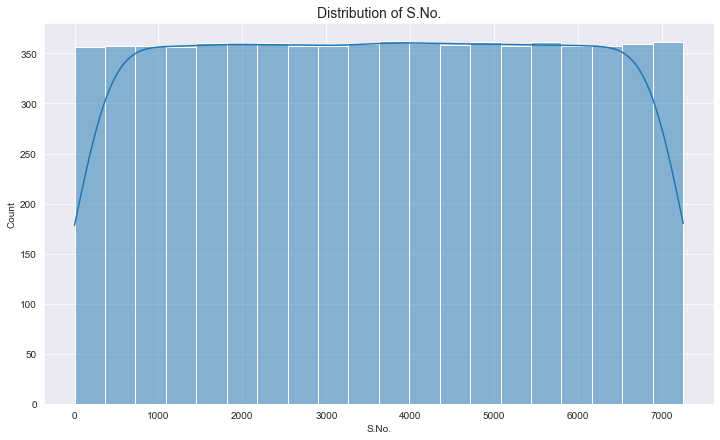

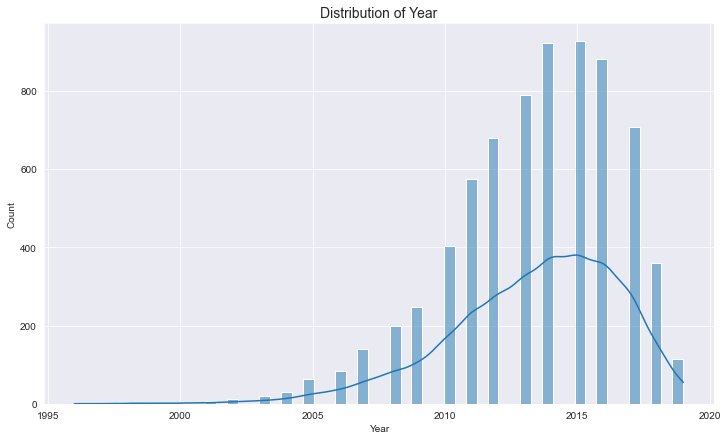

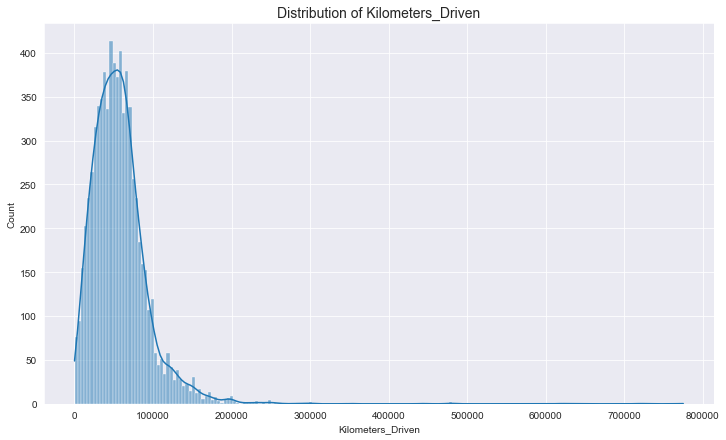

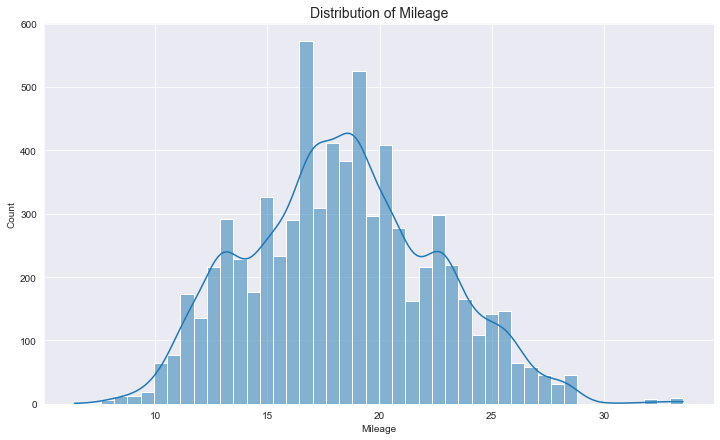

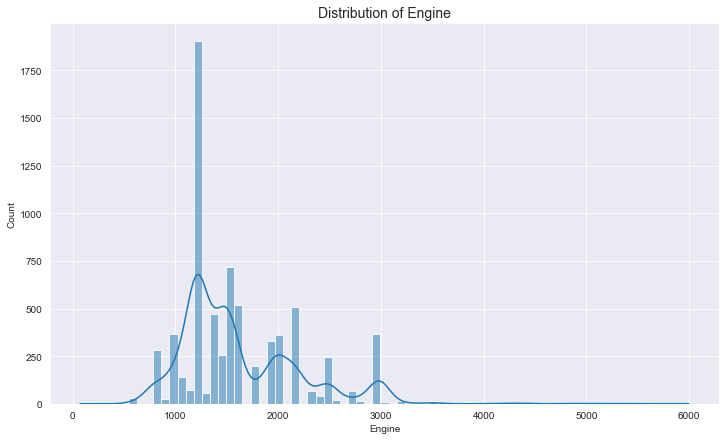

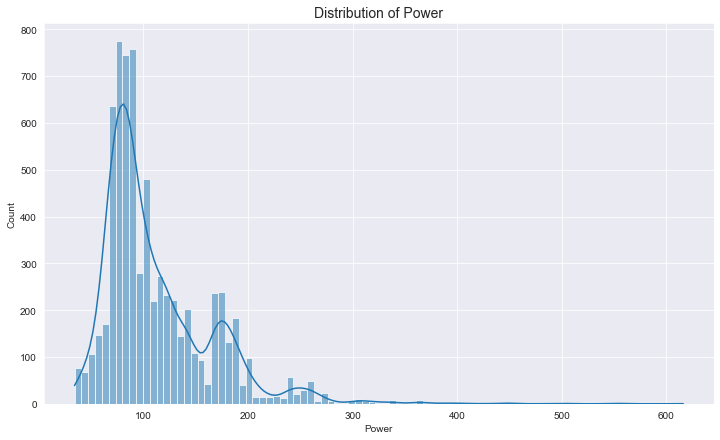

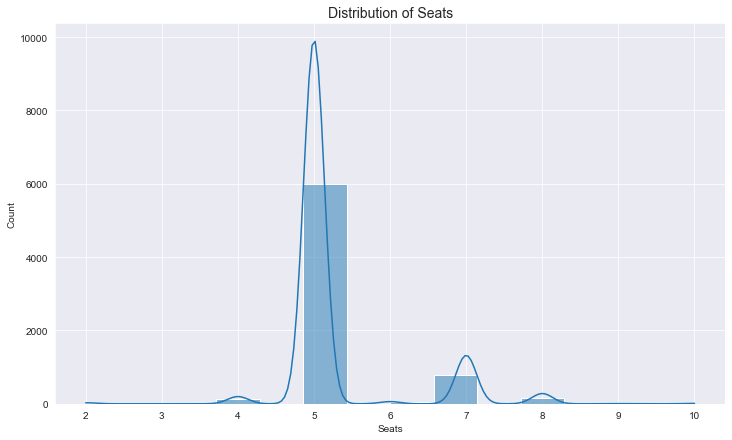

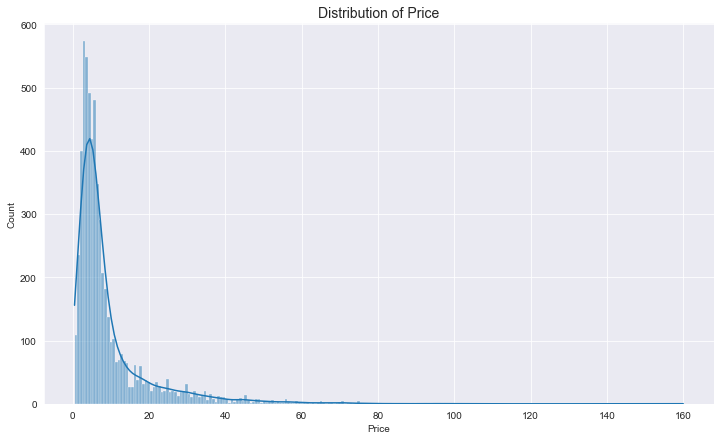

In [12]:
# Plotting all numerical variables to look at their distributions
for i in df.columns:
    if df[i].dtype in [np.float64, np.int64]:
        
        plt.figure(figsize=(12, 7))
        plt.title(f"Distribution of {i}", fontsize=14)  # Add a title to the histogram
        sns.histplot(data=df, x=i, kde=True, palette='winter' )
        plt.show()


**Observations:**
- We can see the variable **S.No.** is uniformly distributed. We will check more precisly values in this column after.
- The **Year** distribution is slightly left-skewed with the median lying at 2014 and minimum value at 1996.
- As expected, the variable **Kilometers_Driven** is very right-skewed. It contains data that are spread out. We will treat that after this resume.
- The variable **Mileage** is following an approx multi-modal normal distribution.
- The variables **Engine** and **Power** are following an approx multi-modal normal distribution. Also they are slightly right-skewed. It is probably due to extreme values. We will do some transformation.
- The variable **Seats** is following an approx multi-modal normal distribution.
- Our target variable **Price** is very right-skewed. We will have to do some transformation.

**`S.No.`**: Serial Number

In [13]:
df['S.No.'].head()

0    0
1    1
2    2
3    3
4    4
Name: S.No., dtype: int64

In [14]:
df['S.No.'].tail()

7248    7248
7249    7249
7250    7250
7251    7251
7252    7252
Name: S.No., dtype: int64

In [15]:
df['S.No.'].unique()

array([   0,    1,    2, ..., 7250, 7251, 7252], dtype=int64)

**Observations :**
- Since this column contains same information as index, it is not necessary to keep it. 

In [16]:
df.drop('S.No.', axis=1, inplace= True)

**`Year`**: Manufacturing year of the car

Since the distribution is slightly left-skewed, we have to perform some transformation. In fact, we will replace any values below the 5th percentile with the value at the 5th percentile. This would remove extreme values without affecting the distribution of the rest of the data.

In [17]:
# Find the 5th percentile of the 'Year' column
year_5th_percentile = df['Year'].quantile(0.05)

# Create a new column 'Year_Adjusted' with values adjusted for the 5th percentile
df['Year_Adjusted'] = df['Year'].apply(lambda x: year_5th_percentile if x < year_5th_percentile else x)


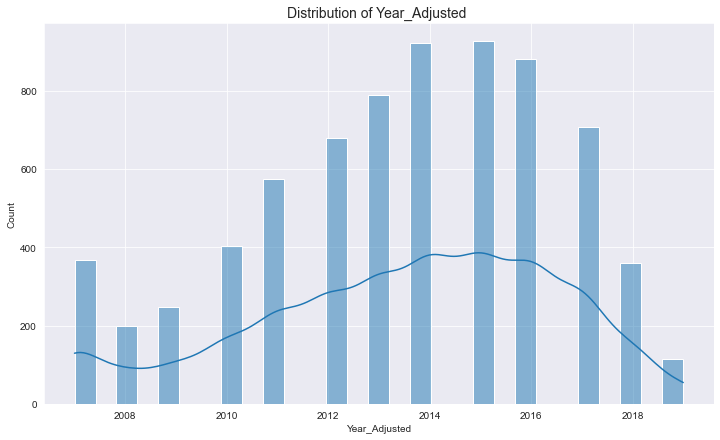

In [18]:
plt.figure(figsize=(12, 7))
plt.title(f"Distribution of Year_Adjusted ", fontsize=14)  
sns.histplot(data=df, x=df['Year_Adjusted'], kde=True, palette='winter' )
plt.show()

In [19]:
skew(df['Year_Adjusted'])

-0.43903000282407795

**Observations:** 
- We can see the transformed variable (Year_Adjusted) appears to have a nearly normal distribution with a skew of -0.43 which is acceptable, it may still be approx as a normal distribution and hence we can proceed.

**`Kilometers_Driven`**: The total kilometers driven in the car by the previous owner(s) in KM

Since the distribution is very right-skewed we have to perform some transformation. We will try a bunch of techniques and see the best fit. 

In [20]:
# Find the 95th percentile of the 'Kilometers_Driven' column
engine_95th_percentile = df['Kilometers_Driven'].quantile(0.95)

# Create a new column 'Kilometers_Driven_Adjusted' with values adjusted for the 95th percentile
df['Kilometers_Driven_Adjusted'] = df['Kilometers_Driven'].apply(lambda x: engine_95th_percentile if x > engine_95th_percentile else x)


In [21]:
skew(df['Kilometers_Driven_Adjusted'])

0.4638675810706646

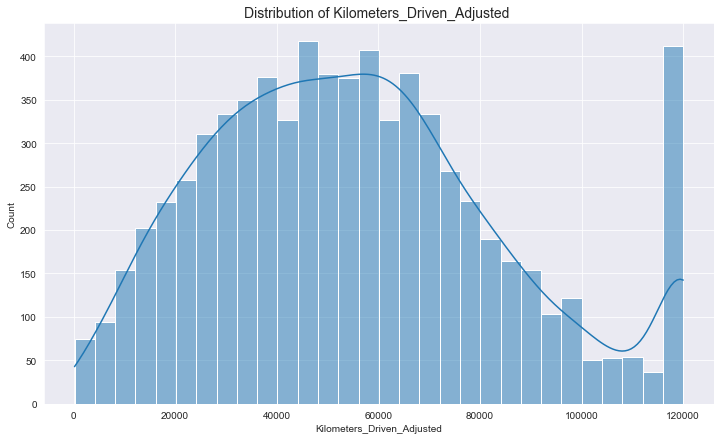

In [22]:
plt.figure(figsize=(12, 7))
plt.title(f"Distribution of Kilometers_Driven_Adjusted ", fontsize=14)  
sns.histplot(data=df, x=df['Kilometers_Driven_Adjusted'], kde=True, palette='winter' )
plt.show()

In [23]:
df['Kilometers_Driven_log'] = np.log(df['Kilometers_Driven'])

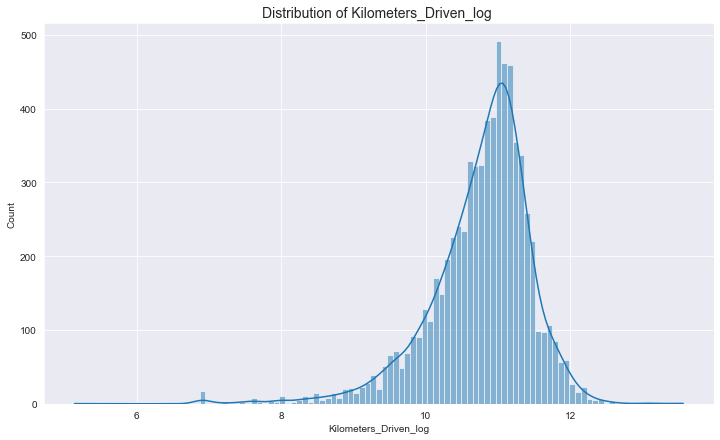

In [24]:
plt.figure(figsize=(12, 7))
plt.title(f"Distribution of Kilometers_Driven_log ", fontsize=14)  
sns.histplot(data=df, x=df['Kilometers_Driven_log'], kde=True, palette='winter' )
plt.show()

In [25]:
skew(df['Kilometers_Driven_log'])

-1.3579469191506728

**Observations:** 
- We can see the adjusted variable (Kilometers_Driven_Adjusted) appears to have a nearly normal distribution with a skew of 0.46 which is acceptable, it may still be approx. as a normal distribution and hence we can proceed. Since we will not use the Kilometers_Driven_log variable, we will drop it.

In [26]:
df.drop('Kilometers_Driven_log', axis=1, inplace= True)

**`Engine`** : The displacement volume of the engine in CC

In [27]:
# Find the 99.5th percentile of the 'Engine' column
engine_99th_percentile = df['Engine'].quantile(0.995)

# Create a new column 'Engine_Adjusted' with values adjusted for the 99.5th percentile
df['Engine_Adjusted'] = df['Engine'].apply(lambda x: engine_99th_percentile if x > engine_99th_percentile else x)


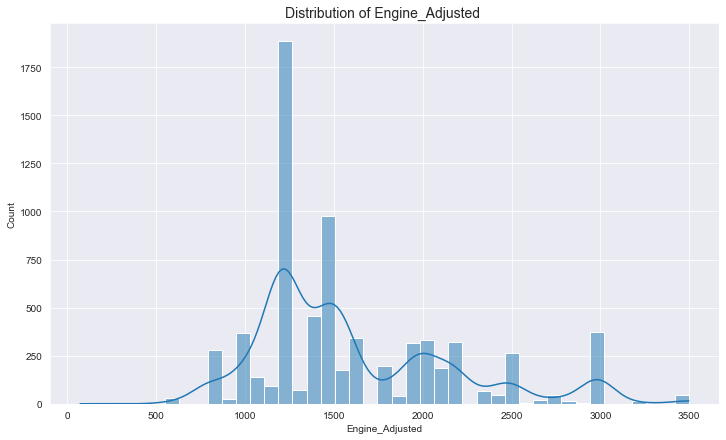

In [28]:
plt.figure(figsize=(12, 7))
plt.title(f"Distribution of Engine_Adjusted ", fontsize=14)  
sns.histplot(data=df, x=df['Engine_Adjusted'], kde=True, palette='winter' )
plt.show()

**Observations:** 
- We can see the adjusted variable (Engine_Adjusted) appears to have a nearly  multi-modal normal  distribution without skew, and hence we can proceed.

**`Power`** : The maximum power of the engine in bhp

In [29]:
# Find the 99th percentile of the 'Power' column
power_99th_percentile = df['Power'].quantile(0.99)

# Create a new column 'Power_Adjusted' with values adjusted for the 99th percentile
df['Power_Adjusted'] = df['Power'].apply(lambda x: power_99th_percentile if x > power_99th_percentile else x)


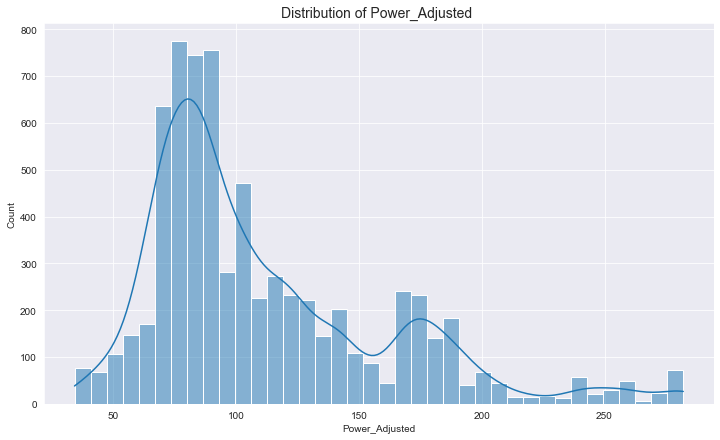

In [30]:
plt.figure(figsize=(12, 7))
plt.title(f"Distribution of Power_Adjusted ", fontsize=14)  
sns.histplot(data=df, x=df['Power_Adjusted'], kde=True, palette='winter' )
plt.show()

**Observations:** 
- We can see the adjusted variable (Power_Adjusted) appears to have a nearly  multi-modal normal  distribution without skew, and hence we can proceed.

**`Price`**: The price of the used car in INR 100,000 (Target Variable)

In [31]:
df['Price_log'] = np.log(df['Price'])

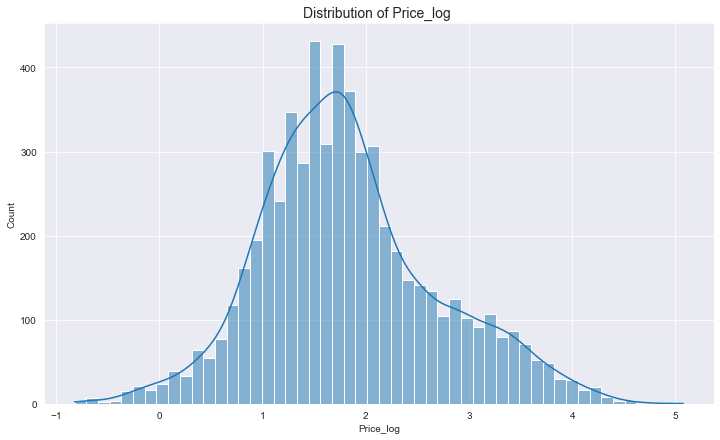

In [32]:
plt.figure(figsize=(12, 7))
plt.title(f"Distribution of Price_log ", fontsize=14)  
sns.histplot(data=df, x=df['Price_log'], kde=True, palette='winter' )
plt.show()

**Observations:** 
- We can see the log-transformed variable (Price_log) appears to have a nearly normal distribution without skew, and hence we can proceed.

Now we move on with analyzing all the categorical variables present in the data. And since we want to visualize one categorical variable at a time, barplot is the best choice to visualize the data.

**`Name`**: Name of the car which includes Brand name and Model name

As we saw earlier, there is 2006 unique values in the **Name** column. It shows a lack of consistent naming conventions. In the car industry, the manufacturer affects the price of a car. A Honda is cheaper than a Porsche. So we will create a new column **Manufacturer** and extract values in the **Name** column and then drop it.

In [33]:
# Split the 'Name' column on spaces and create a new dataframe with the split values
manufacturer = df['Name'].str.split(" ", expand=True)

# Select the first column (index 0) of the new dataframe, which contains the manufacturer name
# and assign it to a new column in the original dataframe called 'Manufacturer'
df['Manufacturer'] = manufacturer[0]

#Drop the 'Name' column 
df.drop('Name', axis=1, inplace=True)

In [34]:
# Create a function to plot a barplot with percentage for each value

def plot_bar(column, figsize=(8,6), rotation=0):
    
    # group the data by the values in the column and calculate the percentage of each value
    counts = column.value_counts(normalize=True) * 100
    
    # create barplot
    fig, ax = plt.subplots(figsize=figsize)
    bars = ax.bar(range(len(counts)), counts)
    
    # add labels to bars
    for i, bar in enumerate(bars):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{counts[i]:.2f}%", ha='center', va='bottom')
    
    # add labels to x-axis
    ax.set_xticks(range(len(counts)))
    ax.set_xticklabels(counts.index, rotation=rotation)
    
    # add y-axis label
    ax.set_ylabel('Percentage')
    
    # set plot title
    ax.set_title(f'Barplot of {column.name}')
    
    # display plot
    plt.show()


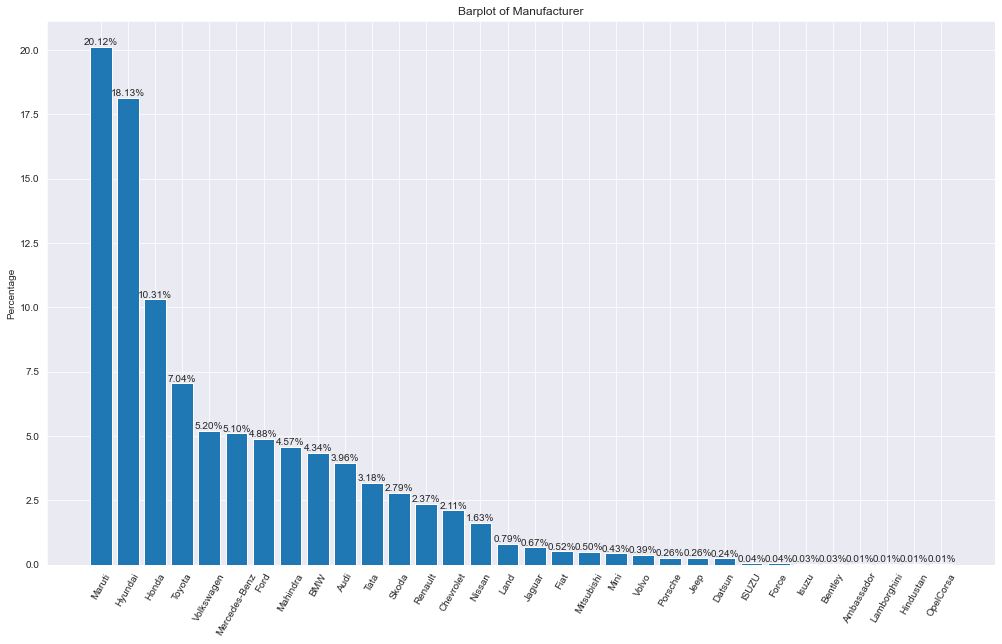

In [35]:
plot_bar(df['Manufacturer'],figsize=(17,10), rotation=60)

**Observations:**
- We observe in this plot that 20.12% of cars sold are manufactured by Marutti, followed by Hyundai (18.13%) and Honda (10.31%).

**`Location`**: The location in which the car is being sold or is available for purchase (Cities)

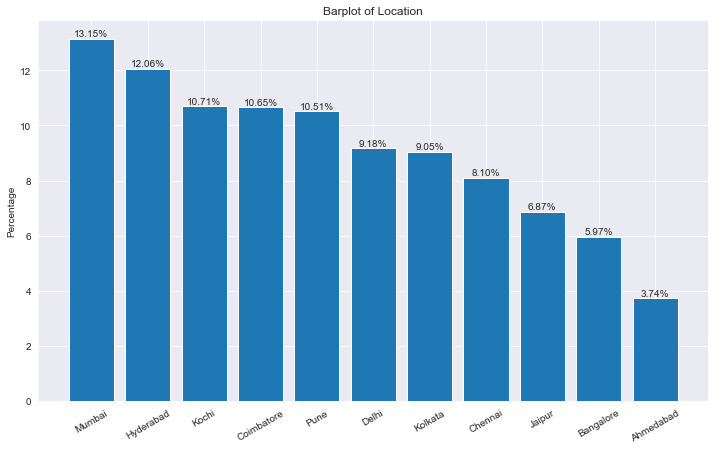

In [36]:
plot_bar(df['Location'],figsize=(12,7), rotation=30)

**Observations:**
- All locations seems to have the same percentage (around 10%) except for Jaipur, Bangalore and Ahmedabad which are more rare.

**`Fuel_Type`** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

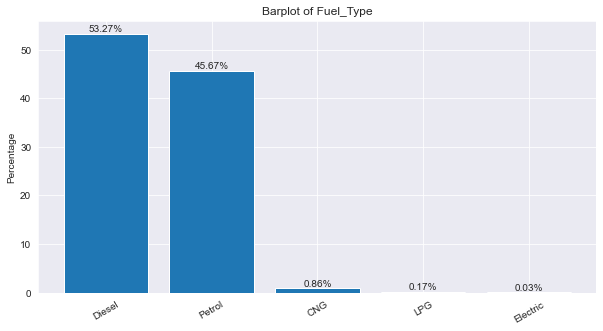

In [37]:
plot_bar(df['Fuel_Type'],figsize=(10,5), rotation=30)

**Observations:**
- The majority of cars are diesel (53.27%) or petrol (45.67%) type. 

**`Transmission`** : The type of transmission used by the car (Automatic / Manual)

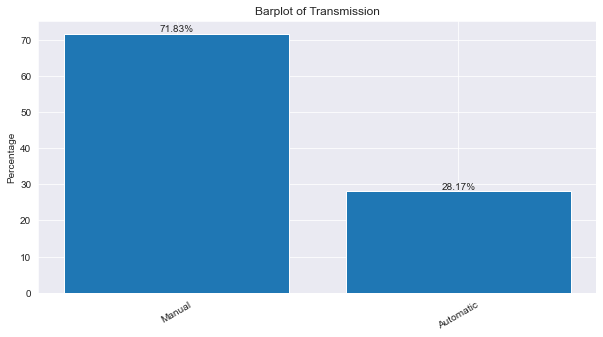

In [38]:
plot_bar(df['Transmission'],figsize=(10,5), rotation=30)

**Observations:**
- The vast majority of cars have a manual transmission (71.83%).

**`Owner`**: Type of ownership

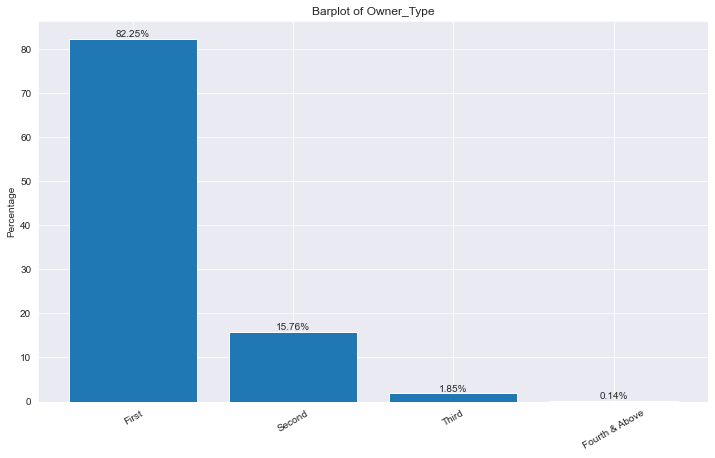

In [39]:
plot_bar(df['Owner_Type'],figsize=(12,7), rotation=30)

**Observations:**
- The vast majority of cars are sold by first owner (82.25%)

**Bivariate Analysis**

Now, let's move ahead with bivariate analysis to understand how variables are related to each other and if there is a strong relationship between dependent and independent variables present in the training dataset.

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

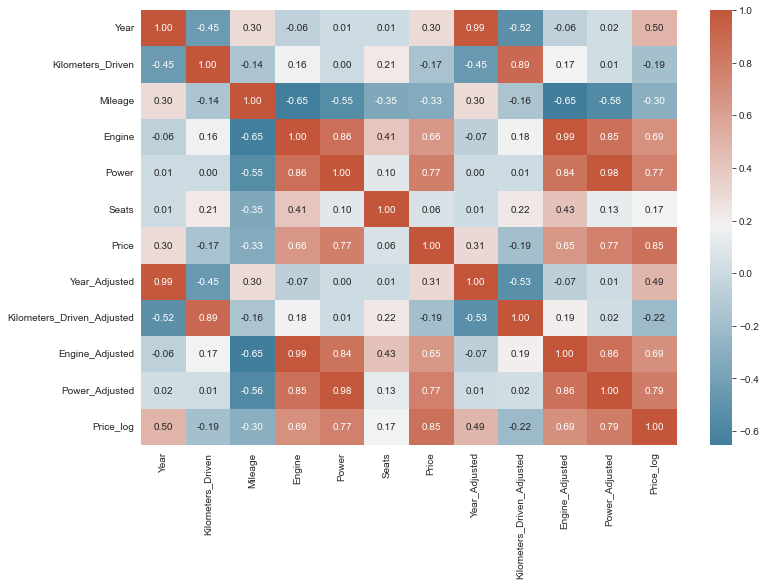

In [40]:
plt.figure(figsize = (12, 8))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = cmap)

plt.show()

**Observations:**
- There is a negative correlation between Mileage and Engine_Adjusted.
- There is a strong positive correlation between Engine_Adjusted and Price_log.
- There is a strong positive correlation between Engine_Adjusted and Power_Adjusted.
- There is a strong positive correlation between Power_Adjusted and Price_log.

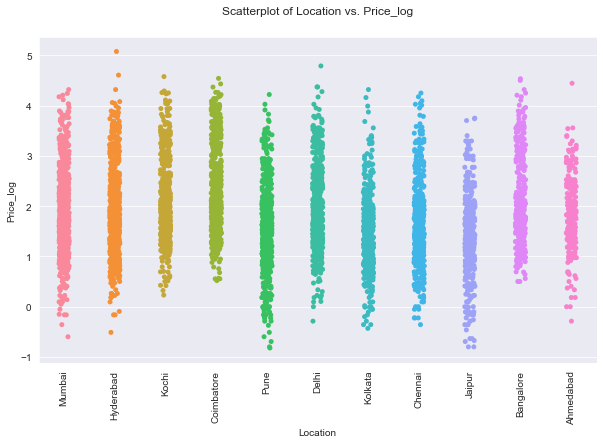

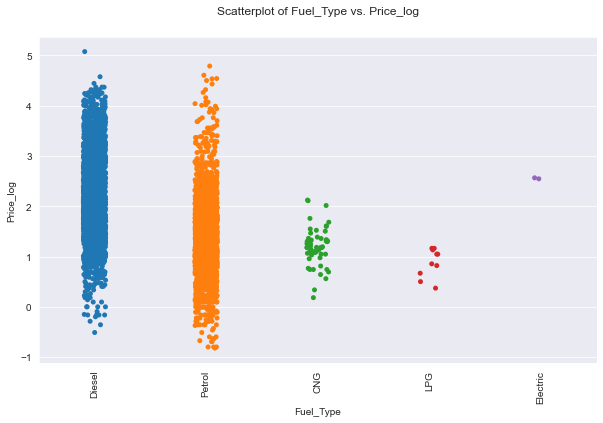

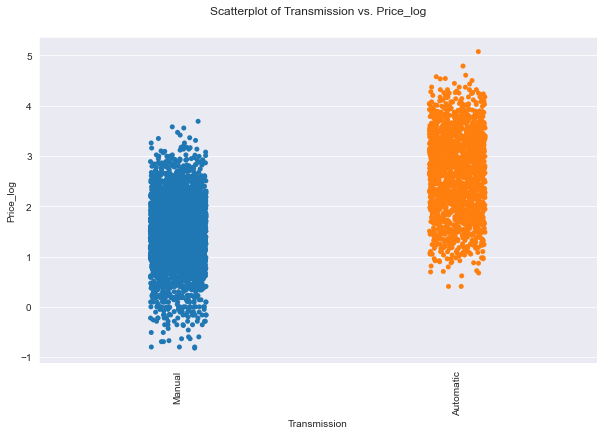

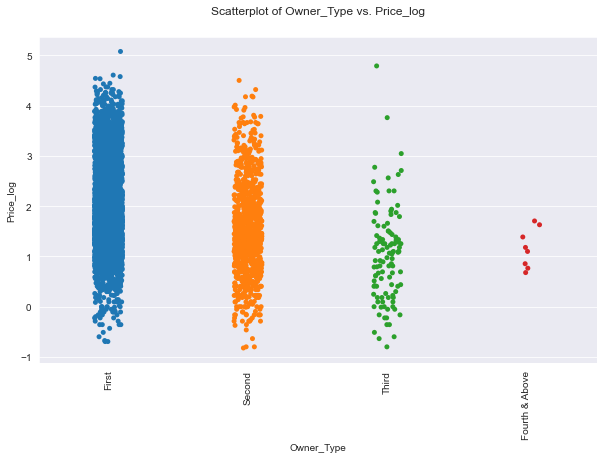

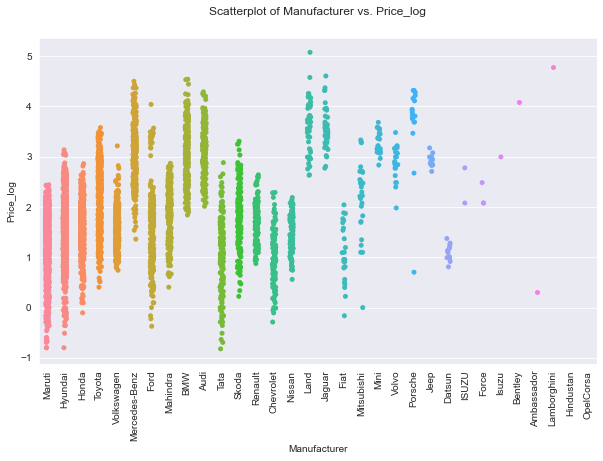

In [41]:
# loop over the categorical variables and create scatterplots    
for category in df.select_dtypes(include='object'):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.stripplot(x=category, y='Price_log', data=df, ax=ax, order=df[category].value_counts().index)
    ax.set_title(f'Scatterplot of {category} vs. Price_log', y=1.05)
    ax.tick_params(axis='x', rotation=90)
    plt.show()

**Observations:**
- There is no trend visible between Price_log and Location also with Fuel_Type. The price seems to not be affected by those variables.
- We can observe there is a pattern between Transmission and Price_log. The price of an automatic car is higher than a manual.
- There is no trend visible between Price_log and Owner_type. The price is not affected by the owner type.
- We can observe there is a pattern between Manufacturer and Price_log. The price is affected by the manufacturer name. A Porsche car is more expensive than Hyundai.

Now we want to visualize the relationship between the features having significant correlations

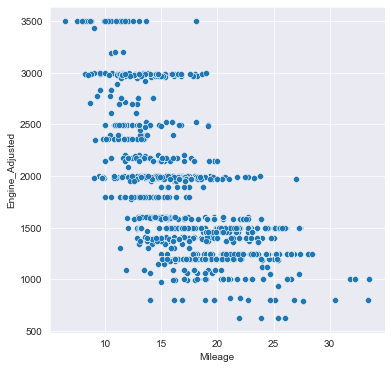

In [42]:
# Scatterplot to visualize the relationship between Mileage and Engine_Adjusted.
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'Mileage', y = 'Engine_Adjusted', data = df)

plt.show()

**Observations:**
- The value of Engine_Adjusted tends to decrease as the standard mileage offered by the car company increases.
- There is a lot of outliers.

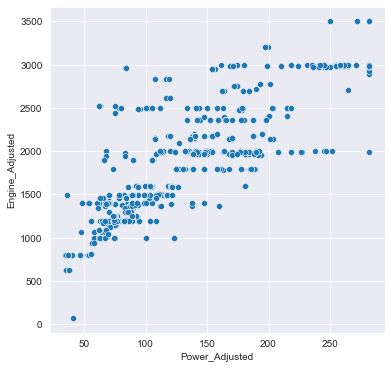

In [43]:
# Scatterplot to visualize the relationship between Power_Adjusted and Engine_Adjusted.
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'Power_Adjusted', y = 'Engine_Adjusted', data = df)

plt.show()

**Observations:**
- The value of Engine_Adjusted tends to increase as the maximum power of the engine increases.
- It seems there is some outliers.

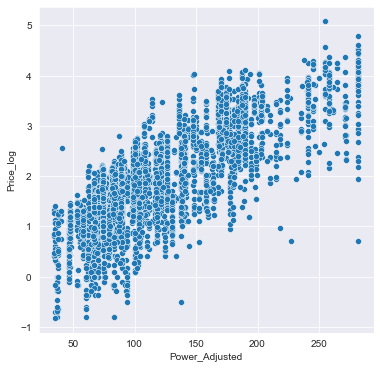

In [44]:
# Scatterplot to visualize the relationship between Power_Adjusted and Price_log.
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'Power_Adjusted', y = 'Price_log', data = df)

plt.show()

**Observations:**
- The value of Price_log tends to increase as the maximum power of the engine increases.
- It seems there is some outliers.

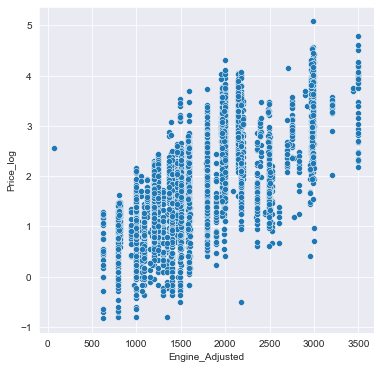

In [45]:
# Scatterplot to visualize the relationship between Engine_Adjusted and Price_log.
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'Engine_Adjusted', y = 'Price_log', data = df)

plt.show()

**Observations:**
- The value of Price_log tends to increase as the displacement volume of the engine increases.
- It seems there is some outliers.

We can see that variables Engine_Adjusted and Power_Adjusted have a linear relationship with the dependent variable Price_log. Also, there are relationships among few independent variables, which is not desirable for a linear regression model. 

### Data Cleaning <a id='data_clean'></a>

### **Missing value treatment**

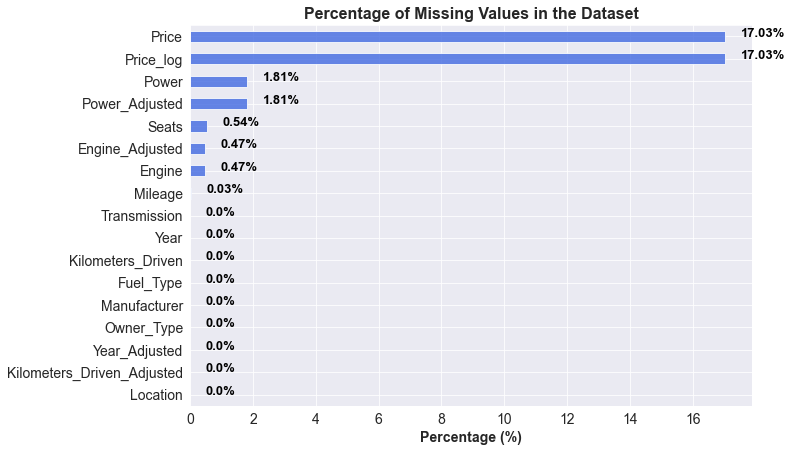

In [46]:
# Set plot style
sns.set_style('darkgrid')

# Create a new figure
my_fig, my_ax = plt.subplots(figsize=(12,7))

# Calculate percentage of NaN values in each column
nan_percentage = (df.isnull().sum() / df.isnull().count()) * 100

# Sort values in descending order and plot as horizontal bar chart
nan_percentage.sort_values(ascending=True).plot(kind='barh', color='royalblue', alpha=0.8, ax=my_ax)

# Add value labels for each bar
for i, v in enumerate(nan_percentage.sort_values(ascending=True)):
    my_ax.text(v + 0.5, i, str(round(v,2)) + '%', color='black', fontsize=13,fontweight='bold')

# Set plot title and axis labels
my_ax.set_title('Percentage of Missing Values in the Dataset', fontsize=16, fontweight='bold')
my_ax.set_xlabel('Percentage (%)', fontsize=14, fontweight='bold')
#my_ax.set_ylabel('Columns', fontsize=14, fontweight='bold')

# Customize tick labels
my_ax.tick_params(axis='both', labelsize=14)

# Adjust y-axis label spacing
plt.subplots_adjust(left=0.25)

plt.show()


For variables **Power**, **Seats**, **Engine** and **Mileage** : As they are approx. following a normal distribution, we will imput missing values with respectivly the mean of the non-missing values.

In [47]:
# Calculate the mean of the non-missing values in each variables
mean_pow = df['Power'].mean()
mean_powa = df['Power_Adjusted'].mean()

mean_eng = df['Engine'].mean()
mean_enga = df['Engine_Adjusted'].mean()

mean_seat = df['Seats'].mean()

mean_mil = df['Mileage'].mean()

# Replace the missing values with the mean
df['Power'].fillna(mean_pow, inplace=True)
df['Power_Adjusted'].fillna(mean_powa, inplace=True)

df['Engine'].fillna(mean_eng, inplace=True)
df['Engine_Adjusted'].fillna(mean_enga, inplace=True)

df['Seats'].fillna(mean_seat, inplace=True)

df['Mileage'].fillna(mean_mil, inplace=True)

In [48]:
print(df.isna().sum())

Location                         0
Year                             0
Kilometers_Driven                0
Fuel_Type                        0
Transmission                     0
Owner_Type                       0
Mileage                          0
Engine                           0
Power                            0
Seats                            0
Price                         1221
Year_Adjusted                    0
Kilometers_Driven_Adjusted       0
Engine_Adjusted                  0
Power_Adjusted                   0
Price_log                     1221
Manufacturer                     0
dtype: int64


For **Price** variable it is a more complex situation because it is our target variable. We can not imput value in it we would risk to introduce biais and if we remove NaN values we could lost precious information for our model. It represents 17% of NaN values, it is a lot but we have to try removing them and see if it affects previous identify patterns. 

In [49]:
# drop NaN values in the 'Price' and 'Price_log' columns
df.dropna(subset=['Price', 'Price_log'], inplace=True)

In [50]:
print(df.isna().sum())

Location                      0
Year                          0
Kilometers_Driven             0
Fuel_Type                     0
Transmission                  0
Owner_Type                    0
Mileage                       0
Engine                        0
Power                         0
Seats                         0
Price                         0
Year_Adjusted                 0
Kilometers_Driven_Adjusted    0
Engine_Adjusted               0
Power_Adjusted                0
Price_log                     0
Manufacturer                  0
dtype: int64


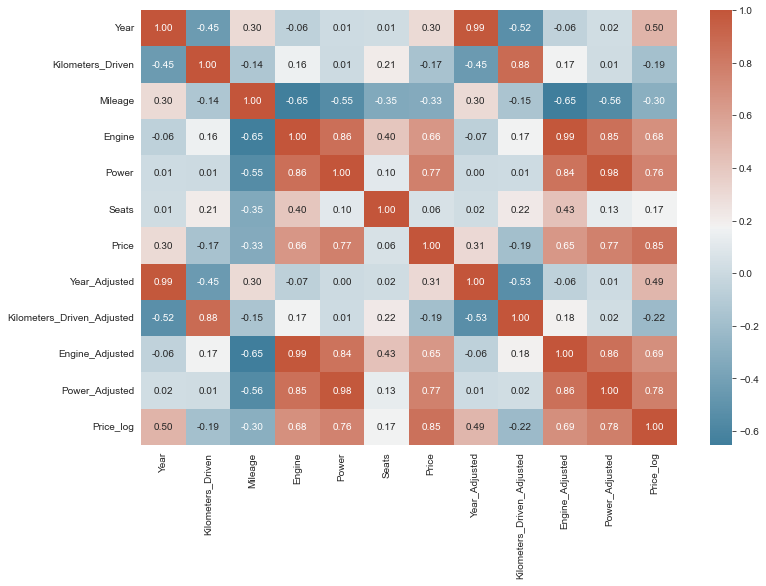

In [51]:
plt.figure(figsize = (12, 8))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = cmap)

plt.show()

**Observations:**
- It seems there is no effect on correlation between previous identify relationships.

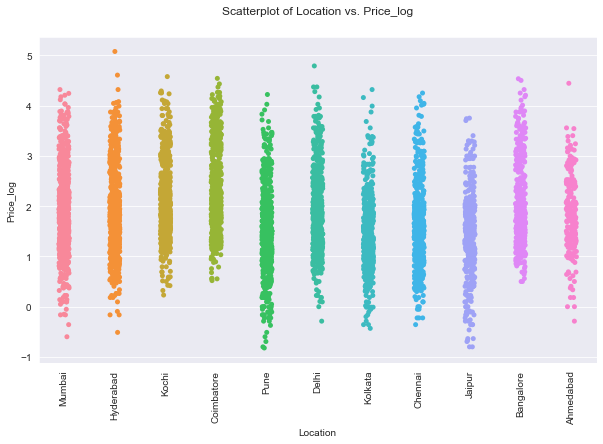

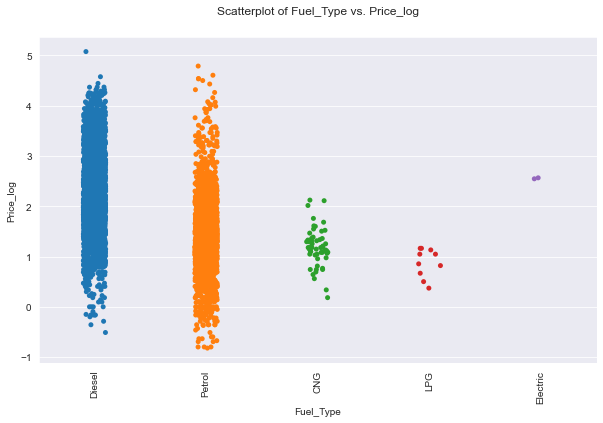

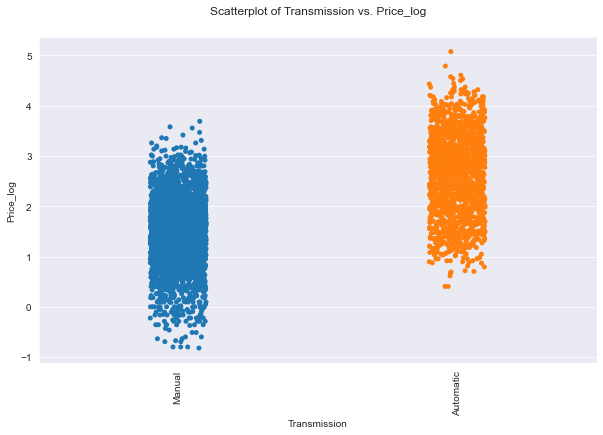

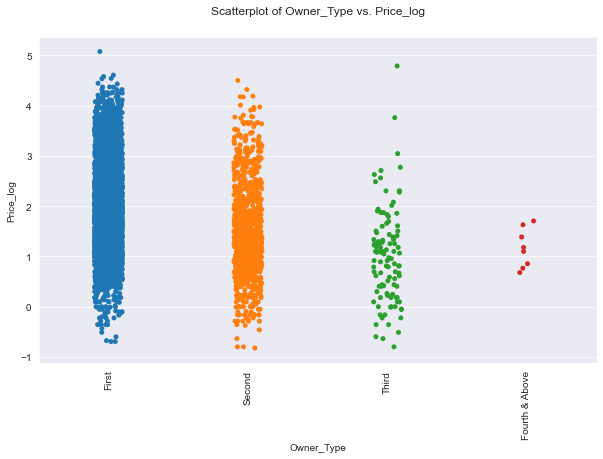

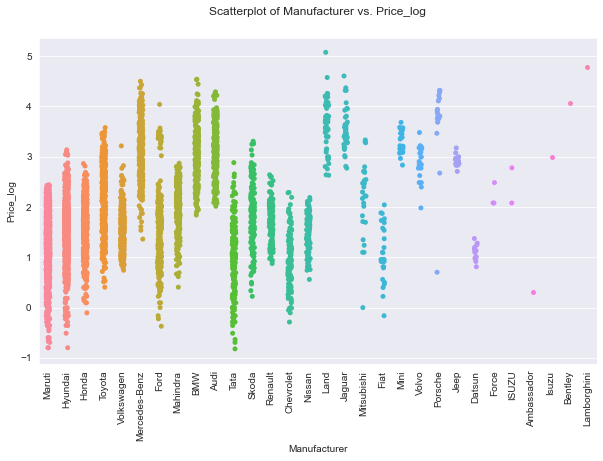

In [52]:
# loop over the categorical variables and create scatterplots    
for category in df.select_dtypes(include='object'):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.stripplot(x=category, y='Price_log', data=df, ax=ax, order=df[category].value_counts().index)
    ax.set_title(f'Scatterplot of {category} vs. Price_log', y=1.05)
    ax.tick_params(axis='x', rotation=90)
    plt.show()

**Observations:**
- It seems there is no effect on previous trend identify.

**Conclusion:** 
- Remove NaN values in the **Price** column did not affect previous trend/relationship between independants variables and our target variable. We can move on the next part.

### **Feature Engineering** <a id='feature'></a>

In this section it will be more like a short conclusion of what we did so far since we did Data Preprocessing/Feature Engineering as we went along. 
- First of all, we have decided to drop the column **New_Price** since it was missing approx 86%. This was too much to ascertain anything useful.

- In the EDA part, we identify some extreme values that could have affect our analysis and we decided to remove them. Specifically in column **Kilometers_Driven** and **Mileage**.

- After that we visualize all the numerical variables. We identify some of them who needs to be adjusted/ transformed. In particular : 
    - The variable **S.No.** which was not necessary since it was the same information as index. We decided to drop this variable.
    - The variable **Year** needed to be capped since his distribution was slightly left-skewed.
    - The distribution of **Kilometers-Driven** was very right-skewed. We try two techniques (log transformation and capping extreme values). We choose the capped one as it was the best (whit the less skew value).
    - We also did the capping method with **Power** and **Engine** variables as they were slightly right-skewed. 
    - Our target variable **Price** was right-skewed so we did a log-transformation and it was a success. 
- Then we visualize categorical variables and we also perform transformation :
    - There is a lack of consistent naming conventions in the **Name** column. So we decided to create a new column **Manufacturer** and extract values in the Name column and then drop it.
- For the bivariate analysis we identify : 
    - **Engine_Adjusted** and **Power_Adjusted** have a linear relationship with **Price_log**. Also, there are relationships among few independent variables, which is not desirable for a linear regression model.
    - There is a pattern between **Manufacturer** and **Price_log**.
    - There is a pattern between **Transmission** and **Price_log**.
- And finally we did some data cleaning. For variables **Power**, **Seats**, **Engine** and **Mileage** as they are approx. following a normal distribution, we decided to imput missing values with respectivly the mean of the non-missing values.
- For the **Price** variable it was more complex. We decided to try removing the NaN values and see if it affects previous identify patterns. It was not the case, so we keep this strategy.

### Model Selection and Training <a id='model_selection'></a>

In this section, we will create various model such as **Linear Regression**,  **Random Forest** and **Decision Trees**. 

### **Split the Data**

In [53]:
# Separate the dependent variable and indepedent variables
Y = df['Price_log']

X = df.drop(columns = {'Price', 'Price_log'})

X = pd.get_dummies(X, columns = ["Location","Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

# Add the intercept term
X = sm.add_constant(X)

Reason we should drop 'Price' and 'Price_log' from X before splitting : 
- **Price** and **Price_log** are directly related to the target variable, so including them in the predictor variables would introduce data leakage, as the model would already have access to the target variable information during training.

In [54]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [55]:
print(X_train.shape, X_test.shape)

(4165, 58) (1785, 58)


In [56]:
type(X_train)

pandas.core.frame.DataFrame

Now we want to check the multicollinearity in the training dataset. We are doing this to prevent problems in the regression analysis, including unstable or unreliable estimates of the regression coefficients, inflated standard errors, and difficulties in interpreting the results.
A VIF value of less than 5 is considered acceptable so we will drop features having a VIF score greater than 5 until all features have a VIF score < 5.

In [57]:
# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    
    # Filter features with VIF greater than 5
    vif_high = vif[vif['VIF'] > 5]
    
    if not vif_high.empty:
        print("Features with VIF greater than 5:")
        print(vif_high)
    else:
        print("No features have VIF greater than 5.")


print(checking_vif(X_train))

Features with VIF greater than 5:
                       feature           VIF
0                        const  1.063903e+06
1                         Year  4.619797e+01
4                       Engine  1.257998e+02
5                        Power  7.546675e+01
7                Year_Adjusted  4.688791e+01
8   Kilometers_Driven_Adjusted  5.898998e+00
9              Engine_Adjusted  1.296084e+02
10              Power_Adjusted  7.649050e+01
21           Manufacturer_Audi  1.723231e+02
22            Manufacturer_BMW  1.823746e+02
24      Manufacturer_Chevrolet  7.808263e+01
25         Manufacturer_Datsun  8.244768e+00
26           Manufacturer_Fiat  2.055206e+01
28           Manufacturer_Ford  2.222532e+02
29          Manufacturer_Honda  3.960153e+02
30        Manufacturer_Hyundai  6.355514e+02
33         Manufacturer_Jaguar  2.386499e+01
34           Manufacturer_Jeep  1.238037e+01
36           Manufacturer_Land  3.601004e+01
37       Manufacturer_Mahindra  1.932079e+02
38         Manufactur

Reason we should drop 'Manufacturer' and 'Kilometers_Driven' from X before splitting :
- **Manufacturer** column is directly related to the target variable 'Price', which means it contains information about the target variable. If we keep it in the training set, the model may learn from this information and lead to overfitting, causing poor performance on new, unseen data.
- Since the data in the **Kilometers_Driven** column has a wide range, the high values could potentially have a significant impact on the predictive model. This will ensure that Kilometers_Driven does not influence the splitting process, and that the test set is truly independent of the training set.

In [58]:
# Separate the dependent variable and indepedent variables
Y1 = df['Price_log']

X1 = df.drop(columns = {'Price', 'Price_log','Manufacturer'})

X1 = pd.get_dummies(X1, columns = ["Location", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

# Add the intercept term
X1 = sm.add_constant(X1)

# splitting the data in 70:30 ratio of train to test data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size = 0.30, random_state = 1)

# Drop Kilometers_Driven and Kilometers_Driven_Adjusted variables
X1_train_drop = X1_train.drop(columns = {'Kilometers_Driven','Kilometers_Driven_Adjusted'})

# Check for VIF
print(checking_vif(X1_train_drop))

Features with VIF greater than 5:
             feature            VIF
0              const  763026.159272
1               Year      44.989256
3             Engine     117.726498
4              Power      65.638459
6      Year_Adjusted      45.084696
7    Engine_Adjusted     117.959163
8     Power_Adjusted      63.696002
19  Fuel_Type_Diesel      24.734775
22  Fuel_Type_Petrol      25.805442
None


In [59]:
# Drop Engine, Power and Year variables
X1_train_drop = X1_train.drop(columns = {'Engine','Year','Power','Kilometers_Driven','Kilometers_Driven_Adjusted'})

# Check for VIF
print(checking_vif(X1_train_drop))

Features with VIF greater than 5:
             feature            VIF
0              const  723822.302224
4    Engine_Adjusted       8.316277
5     Power_Adjusted       6.161293
16  Fuel_Type_Diesel      24.703290
19  Fuel_Type_Petrol      25.791014
None


In [60]:
# Drop Fuel_Type variable
X1_train_drop = X1_train.drop(columns = {'Engine','Year','Power','Kilometers_Driven','Kilometers_Driven_Adjusted','Fuel_Type_Petrol','Fuel_Type_Diesel'})

# Check for VIF
print(checking_vif(X1_train_drop))

Features with VIF greater than 5:
           feature            VIF
0            const  722543.724803
4  Engine_Adjusted       6.558016
5   Power_Adjusted       6.151433
None


In [61]:
# Drop Engine_Adjusted variable
X1_train_drop = X1_train.drop(columns = {'Engine', 'Engine_Adjusted','Year','Power','Kilometers_Driven','Kilometers_Driven_Adjusted','Fuel_Type_Petrol','Fuel_Type_Diesel'})

# Check for VIF
print(checking_vif(X1_train_drop))

Features with VIF greater than 5:
  feature            VIF
0   const  719986.795747
None


**Observations**: 
- Now that the VIF is less than 5 for all the independent variables. We can assume that multicollinearity has been removed between variable. We can move on building a linear regression model. 

In [62]:
# Separate the dependent variable and indepedent variables
YF = df['Price_log']


XF = df.drop(columns = {'Price', 'Price_log','Manufacturer','Fuel_Type','Engine', 'Engine_Adjusted','Year','Power','Kilometers_Driven','Kilometers_Driven_Adjusted'})

XF = pd.get_dummies(XF, columns = ["Location", "Transmission", "Owner_Type"],
                         drop_first = True)

# Add the intercept term
XF = sm.add_constant(XF)

# splitting the data in 70:30 ratio of train to test data
XF_train, XF_test, yf_train, yf_test = train_test_split(XF, YF, test_size = 0.30, random_state = 1)


In [63]:
type(XF_train)

pandas.core.frame.DataFrame

In [64]:
print(checking_vif(XF_train))

Features with VIF greater than 5:
  feature           VIF
0   const  719144.70061
None


**`Linear Regression model`**

In [65]:
# Create the model
model1 = sm.OLS(yf_train,XF_train).fit()

# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1487.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:15:08   Log-Likelihood:                -1105.8
No. Observations:                4165   AIC:                             2250.
Df Residuals:                    4146   BIC:                             2370.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      -257.2517      4.156    -61.901      0.000    -265.399    -249.104
Mileage                       0.0036      0.002      2.154      0.031       0.000       0.007
Seats                         0.0813      0.007     11.928      0.000       0.068       0.095
Year_Adjusted                 0.1279      0.002     61.680      0.000       0.124       0.132
Power_Adjusted                0.0118      0.000     78.973      0.000       0.012       0.012
Location_Bangalore            0.1425      0.033      4.300      0.000       0.078       0.208
Location_Chennai             -0.0212      0.032     -0.673      0.501      -0.083       0.041
Location_Coimbatore           0.0290      0.031      0.951      0.342      -0.031       0.089
Location_Delhi               -0.0733      0.031     -2.368      0.018      -0.134      -0.013
Location_Hyderabad            0.1347      0.030      4.508      0.000       0.076       0.193
Location_Jaipur              -0.1078      0.032     -3.342      0.001      -0.171      -0.045
Location_Kochi               -0.0873      0.031     -2.861      0.004      -0.147      -0.027
Location_Kolkata             -0.2572      0.031     -8.344      0.000      -0.318      -0.197
Location_Mumbai              -0.1172      0.030     -3.972      0.000      -0.175      -0.059
Location_Pune                -0.0962      0.030     -3.169      0.002      -0.156      -0.037
Transmission_Manual          -0.2546      0.015    -17.062      0.000      -0.284      -0.225
Owner_Type_Fourth & Above    -0.0358      0.183     -0.196      0.845      -0.395       0.324
Owner_Type_Second            -0.0696      0.014     -4.826      0.000      -0.098      -0.041
Owner_Type_Third             -0.2127      0.040     -5.369      0.000      -0.290      -0.135
==============================================================================
Omnibus:                      715.093   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13513.871
Skew:                          -0.217   Prob(JB):                         0.00
Kurtosis:                      11.814   Cond. No.                     1.71e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observations**:
- We can see above that the regression coefficients corresponding to Location_Coimbatore, Location_Chennai and Owner_Type_Fourth & Above are not statistically significant at level α = 0.05 since their p-value are greater than 0.05. We will eliminate these features and create a new model.

In [66]:
# Create new model 
YF = df['Price_log']


XF = df.drop(columns = {'Price','Price_log','Manufacturer','Fuel_Type','Engine', 'Engine_Adjusted',
                        'Year','Power','Kilometers_Driven','Kilometers_Driven_Adjusted'})

XF = pd.get_dummies(XF, columns = ["Location", "Transmission", "Owner_Type"],
                         drop_first = True)

XF = XF.drop(columns = {'Owner_Type_Fourth & Above', 'Location_Coimbatore', 'Location_Chennai'})

# Add the intercept term
XF = sm.add_constant(XF)

# splitting the data in 70:30 ratio of train to test data
XF_train, XF_test, yf_train, yf_test = train_test_split(XF, YF, test_size = 0.30, random_state = 1)


In [67]:
# Create the model
model2 = sm.OLS(yf_train,XF_train).fit()

# Predict on the testing data
y_pred_linear = model2.predict(XF_test)

# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1783.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:15:09   Log-Likelihood:                -1108.1
No. Observations:                4165   AIC:                             2248.
Df Residuals:                    4149   BIC:                             2350.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -259.2599      4.045    -64.089      0.000    -267.191    -251.329
Mileage                 0.0034      0.002      2.000      0.046    6.64e-05       0.007
Seats                   0.0807      0.007     11.855      0.000       0.067       0.094
Year_Adjusted           0.1289      0.002     63.886      0.000       0.125       0.133
Power_Adjusted          0.0118      0.000     79.004      0.000       0.012       0.012
Location_Bangalore      0.1367      0.023      6.001      0.000       0.092       0.181
Location_Delhi         -0.0791      0.019     -4.057      0.000      -0.117      -0.041
Location_Hyderabad      0.1297      0.018      7.213      0.000       0.094       0.165
Location_Jaipur        -0.1126      0.022     -5.212      0.000      -0.155      -0.070
Location_Kochi         -0.0954      0.018     -5.177      0.000      -0.132      -0.059
Location_Kolkata       -0.2626      0.019    -13.522      0.000      -0.301      -0.225
Location_Mumbai        -0.1235      0.017     -7.264      0.000      -0.157      -0.090
Location_Pune          -0.1010      0.019     -5.429      0.000      -0.138      -0.065
Transmission_Manual    -0.2550      0.015    -17.086      0.000      -0.284      -0.226
Owner_Type_Second      -0.0704      0.014     -4.884      0.000      -0.099      -0.042
Owner_Type_Third       -0.2153      0.040     -5.441      0.000      -0.293      -0.138
==============================================================================
Omnibus:                      716.642   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13532.970
Skew:                          -0.221   Prob(JB):                         0.00
Kurtosis:                      11.820   Cond. No.                     1.66e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now we will check the below linear regression assumptions: 

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

 **1. Check for mean residuals**

In [68]:
residuals = model2.resid 

np.mean(residuals)

-3.6098228581308293e-13

**Observations:**
- The mean of residuals is very close to 0. So we can say that the assumption is satisfied.

 **2. Check for  for homoscedasticity**
 
 We'll use `Goldfeldquandt` Test to test the following hypothesis with alpha = 0.05:

Null hypothesis: Residuals are homoscedastic
Alternate hypothesis: Residuals have heteroscedastic

In [69]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(yf_train, XF_train)

lzip(name, test)

[('F statistic', 0.9986018180660081), ('p-value', 0.5126820955073418)]

**Observations:**
- As we observe from the above test, the p-value is 0.51 it's greater than 0.05. We fail to reject the null-hypothesis. That means the residuals are homoscedastic.

**3. Linearity of variables** (ensure that residuals do not form a strong pattern with the fitted values)

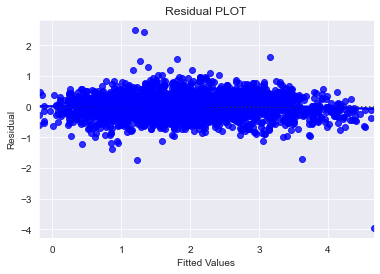

In [70]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "blue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Observations:**
- There is no pattern in the residuals vs fitted values scatter plot now .The linearity assumption is satisfied.

**4. Normality of error terms**

<AxesSubplot:ylabel='Count'>

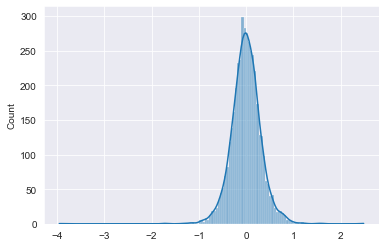

In [71]:
# Plot histogram of residuals
sns.histplot(residuals, kde = True)

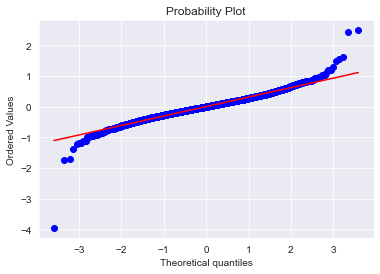

In [72]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

**Observations:**
- We can see that the error terms are normally distributed. The assumption of normality is satisfied.

**`Random Forest`**
Here we are creating the random forest model using the RandomForestRegressor as it is a regression problem. 

In [73]:
model_random = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=1)

# Train the model
model_random.fit(XF_train, yf_train)

# Predict on the testing data
y_pred_random = model_random.predict(XF_test)

**`Decision Tree`**
Here we are creating the decision tree model using the DecsionTreeRegressor as it is a regression problem. 

In [74]:
tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=1)

# Fit the model to the training data
tree_regressor.fit(XF_train, yf_train)

# Predict on the testing data
y_pred_decision = tree_regressor.predict(XF_test)

### Model Evaluation and Optimization <a id='model_evaluation'></a>

In this section, we will evaluate the performance of trained models using metrics such as mean squared error and R squared. 

**`Linear Regression model`**

In [75]:
# Evaluate the linear regression model
mse = mean_squared_error(yf_test, y_pred_linear)
r2 = r2_score(yf_test, y_pred_linear)
print('Mean squared error:', mse)
print('R^2 :', r2)

Mean squared error: 0.10238336622264121
R^2 : 0.8666247221020129


**Observations:**
- The mean squared error value of 0.10238 indicates the average squared difference between the predicted values and the actual values in the dataset. A smaller MSE value implies a better fit of the model to the data.

- The R-squared value of 0.86662 suggests that approx. **87%** of the variability in the dependent variable (target) is explained by the independent variables (features) included in the model. 

- Overall, the MSE and R-squared values suggest that the model has a good fit to the data and can be used to make accurate predictions.

Now we will perform cross-validation to assess how well our model is likely to perform in practice. It will help us to avoid overfitting, which occurs when a model is too complex and has memorized the training data, resulting in poor performance on new data.

In [76]:
# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, XF_train, yf_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, XF_train, yf_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.863 (+/- 0.046)
Mean Squared Error: 0.101 (+/- 0.027)


**Observations**:
- We can see that the linear regression model has reasonably good predictive performance, with an R-squared value of 0.863 indicating a reasonably strong fit to the data, and a low MSE indicating that the model's predictions are, on average, close to the true values.

In [77]:
# Here is our regression coefficients

coef = model2.params

pd.DataFrame({'Feature': list(XF_train.columns), 'Coefs': coef.values})

,Feature,Coefs
0,const,-259.259908
1,Mileage,0.003362
2,Seats,0.080731
3,Year_Adjusted,0.128892
4,Power_Adjusted,0.011821
5,Location_Bangalore,0.136677
6,Location_Delhi,-0.079111
7,Location_Hyderabad,0.129664
8,Location_Jaipur,-0.112572
9,Location_Kochi,-0.095430


In [85]:
# Here is the equation of our linear regression model
Equation = "log(Price) = "
print(Equation, end = '\t')
for i in range(len(coef)):
    print('(', round(coef[i], 3), ') * ', coef.index[i], end='')
    if i < len(coef) - 1:
        print(' +', end=' ')

log(Price) = 	( -259.26 ) *  const + ( 0.003 ) *  Mileage + ( 0.081 ) *  Seats + ( 0.129 ) *  Year_Adjusted + ( 0.012 ) *  Power_Adjusted + ( 0.137 ) *  Location_Bangalore + ( -0.079 ) *  Location_Delhi + ( 0.13 ) *  Location_Hyderabad + ( -0.113 ) *  Location_Jaipur + ( -0.095 ) *  Location_Kochi + ( -0.263 ) *  Location_Kolkata + ( -0.124 ) *  Location_Mumbai + ( -0.101 ) *  Location_Pune + ( -0.255 ) *  Transmission_Manual + ( -0.07 ) *  Owner_Type_Second + ( -0.215 ) *  Owner_Type_Third

**`Decision Tree`**

### **Hyperparameter Tuning: Decision Tree**

In [79]:
# Evaluate the Decision Tree model
mse = mean_squared_error(yf_test, y_pred_decision)
r2 = r2_score(yf_test, y_pred_decision)
print('Mean squared error:', mse)
print('R^2 :', r2)

Mean squared error: 0.11600205152584525
R^2 : 0.8488835986760633


 **Observations**: 
 - We can see that our R_squared is approx. 0.8489 which is great but we can try to make a better prediction model.

- Next step we will performe hyperparameter tuning for our decision tree regression model using grid search cross-validation. We will see if we can make a better model.

In [80]:
# Define the decision tree model
dt_model = DecisionTreeRegressor()

# Define the hyperparameter grid to search over
param_grid = {
    'max_depth': [2, 4, 6, 8, 10], #the maximum depth of the tree
    'min_samples_split': [2, 4, 6, 8, 10],  #the minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 8], #the minimum number of samples required to be at a leaf node
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(XF_train, yf_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_dt_model = DecisionTreeRegressor(**best_params)
best_dt_model.fit(XF_train, yf_train)

# Make predictions on the test set
y_pred_dec_best = best_dt_model.predict(XF_test)

# Calculate the mean squared error
mse = mean_squared_error(yf_test, y_pred_dec_best)
r2 = r2_score(yf_test, y_pred_dec_best)
print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 : {r2:.3f}")

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 4}
Mean Squared Error: 0.088
R^2 : 0.886


**Observations**: 
- Now we can see that we have a lower MSE than our first model. It means that the model's predictions are, on average, closer to the true values. Also we have a R_squared of 0.886 which is good, it indicates a stronger fit to the data. 
- **88.6%** of the variability in the dependent variable (target) is explained by the independent variables (features) included in the model.

**`Random Forest`**

### **Hyperparameter Tuning: Random Forest**

In [81]:
# Evaluate the Random Forest model
mse = mean_squared_error(yf_test, y_pred_random)
r2 = r2_score(yf_test, y_pred_random)
print('Mean squared error:', mse)
print('R^2 :', r2)

Mean squared error: 0.06770943611687263
R^2 : 0.9117946089136615


 **Observations**: 
 - We can see that our R_squared is approx. 0.912  and MSE is low which is very good, we will performe hyperparameter tuning  using grid search cross-validation and we will see if we can make a better model.

In [86]:
# Define the random forest model
rf_model = RandomForestRegressor()

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200, 300], #the number of trees in the forest
    'max_depth': [2, 4, 6, 8, 10], #the maximum depth of the tree
    'min_samples_split': [2, 4, 6, 8, 10],  #the minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 8], #the minimum number of samples required to be at a leaf node
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(XF_train, yf_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(XF_train, yf_train)

# Make predictions on the test set
y_pred_random_best = best_rf_model.predict(XF_test)

# Calculate the mean squared error
mse = mean_squared_error(yf_test, y_pred_random_best)
r2 = r2_score(yf_test, y_pred_random_best)
print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 : {r2:.3f}")

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
Mean Squared Error: 0.068
R^2 : 0.911


**Observations:**
- The R-squared value of 0.911 means **91.1%** of the variation in the target variable can be explained by the model, which is a good fit. 
- The mean squared error of 0.068 is relatively low, indicating that the model's predictions are accurate.

Overall, we have obtained a good performing random forest model.

### **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 

Based on the mean squared error and R-squared metrics, we can compare the performance of the three models:

    Linear Regression: MSE = 0.102 and R-squared = 0.867
    Decision Tree: MSE = 0.088 and R-squared = 0.886
    Random Forest: MSE = 0.068 and R-squared = 0.911

We can see the Random Forest model outperforms the other two models in terms of both Mean Squared Error and R-squared. Therefore, we recommend using the Random Forest model as the final solution.

**2. Refined insights:** 

Based on the Random Forest model, we can gain the following insights:

- **Mileage**, **Year_Adjusted**, **Power_Adjusted**, **Location**, **Transmission**, and **Owner_Type** are significant predictors of the car price.
    
- The **location** of the car has a significant impact on the price. For example, the location 'Bangalore' has a positive coefficient, which suggests that prices of cars in Bangalore are higher than prices in other locations.
    
- The **transmission type 'Manual'** has a negative coefficient, indicating that prices of manual transmission cars are lower than prices of automatic transmission cars.
    
- The **owner type 'Third'** has a negative coefficient, suggesting that cars with third owners have lower prices than cars with first or second owners.


**3. Proposal for the final solution design:** 

- In conclusion, we developed and compared three different models (linear regression, decision tree, and random forest) for predicting the worth of a used car. While all three models performed relatively well, the random forest model outperformed the others in terms of both mean squared error and R^2. We propose to use the **Random Forest model** as the final solution. The model can be deployed as a web application that takes inputs such as **Mileage**, **Seats**, **Year**, **Power**, **Location**, **Transmission**, and **Owner_Type** and predicts the price of a used car. The Random Forest model can be trained on a larger dataset with more features to improve its performance further.